Objective: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Data Source : https://www.kaggle.com/henriqueyamahata/bank-marketing

Importing all the needed libraries

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

Setting a random seed of 3 inorder to re-seed the generator when needed

In [100]:
np.random.seed(3)

Reading the input file to a dataframe

In [101]:
bank = pd.read_csv("Bank_details.csv")

# Intialize Dataset Analysis

In [102]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [103]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37540.000000,37223.000000,38245.000000,37986.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.817821,258.991242,2.566662,963.341968,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566
std,10.307051,260.366884,2.767473,184.769471,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


To get the features names of the data

In [104]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

# Attribute Information

Bank client data

Age (numeric)
Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign

Contact: contact communication type (categorical: 'cellular','telephone')
Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
Day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive mode

Other attributes

Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
Previous: number of contacts performed before this campaign and for this client (numeric)
Poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

Emp.var.rate: employment variation rate - quarterly indicator (numeric)
Cons.price.idx: consumer price index - monthly indicator (numeric)
Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
Euribor3m: euribor 3 month rate - daily indicator (numeric)
Nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target)

y - has the client subscribed a term deposit? (binary: 'yes', 'no')

In [105]:
bank.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [106]:
bank.shape

(38245, 21)

Checking for the count of the null values for each of the features

In [107]:
bank.isnull().sum()

age                705
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration          1022
campaign             0
pdays              259
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

Filling the missing values with the mean

In [108]:
bank['age'] = bank['age'].fillna((bank['age'].mean()))
bank['duration'] = bank['duration'].fillna((bank['duration'].mean()))
bank['pdays'] = bank['pdays'].fillna((bank['pdays'].mean()))

In [109]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Renaming some of the feature names

In [110]:
bank = bank.rename(columns= {"emp.var.rate":"emp_var_rate",
                             "cons.price.idx": "cons_price_idx",
                             "cons.conf.idx": "cons_conf_idx",
                             "nr.employed": " nr_employed",
                             "y" : "term_deposit"})

In [111]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', ' nr_employed', 'term_deposit'],
      dtype=object)

Heat map for the highest correlated features in the bank dataset

Text(0.5, 1, 'Heatmap for highest correlated features')

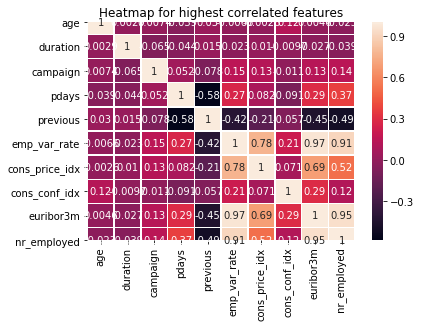

In [112]:
sns.heatmap(bank.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for highest correlated features")

Checking the unique values for job feature in the dataset

In [113]:
bank.job.unique()

array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

Checking the unique values for marital feature in the dataset

In [114]:
bank.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

Checking the unique values for education feature in the dataset

In [115]:
bank.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

Checking the unique values for default feature in the dataset

In [116]:
bank.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

Checking the unique values for housing feature in the dataset

In [117]:
bank.housing.unique()

array(['no', 'yes'], dtype=object)

Checking the unique values for loan feature in the dataset

In [118]:
bank.loan.unique()

array(['no', 'yes'], dtype=object)

Checking the unique values for contact feature in the dataset

In [119]:
bank.contact.unique()

array(['telephone', 'cellular'], dtype=object)

Checking the unique values for month feature in the dataset

In [120]:
bank.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

Checking the unique values for day_of_week feature in the dataset

In [121]:
bank.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

Checking the unique values for poutcome feature in the dataset

In [122]:
bank.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

Checking the unique values for term_deposit feature in the dataset

In [123]:
bank.term_deposit.unique()

array(['no', 'yes'], dtype=object)

# Visualization of the data

Checking the distribution for the age of the customers

Text(0, 0.5, 'Count of customers')

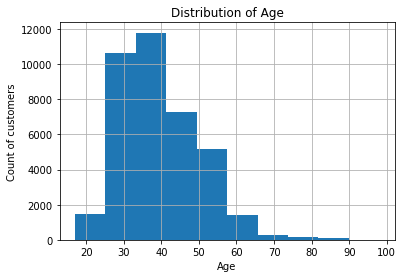

In [124]:
bank.age.hist()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count of customers')


Checking the distribution of the target variable in the dataset

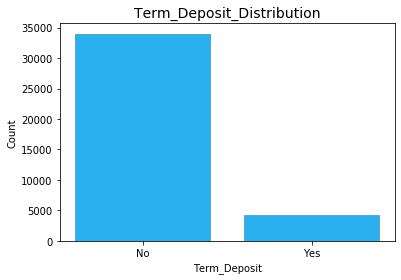

In [125]:
bank['term_deposit'].value_counts()

plt.bar(['No', 'Yes'], bank['term_deposit'].value_counts().values, facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Term_Deposit_Distribution', fontsize=14)
plt.xlabel('Term_Deposit')
plt.ylabel('Count')
plt.show()

Visualizing the distribution of the features and the target variable: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, term_deposit for the dataset

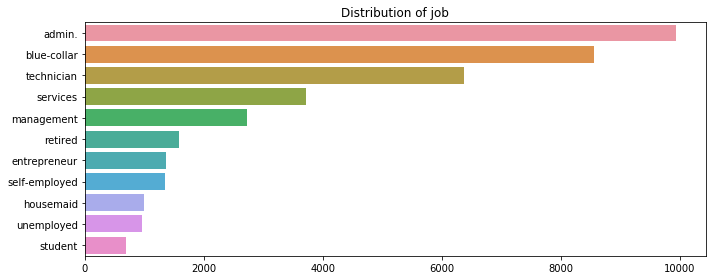

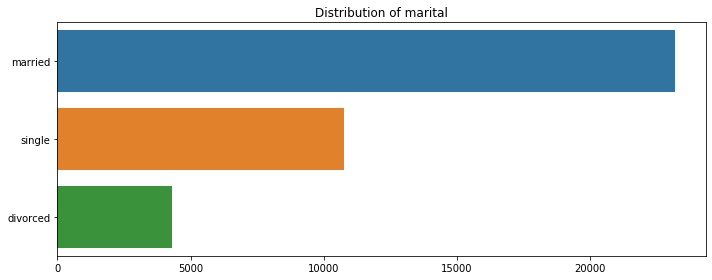

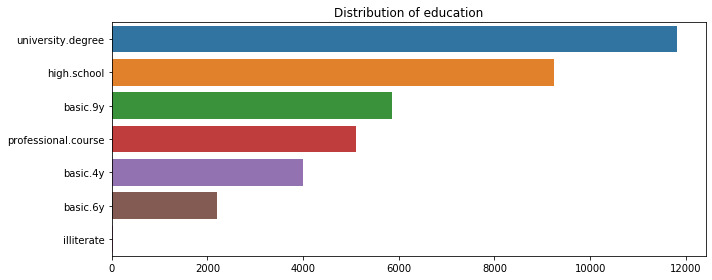

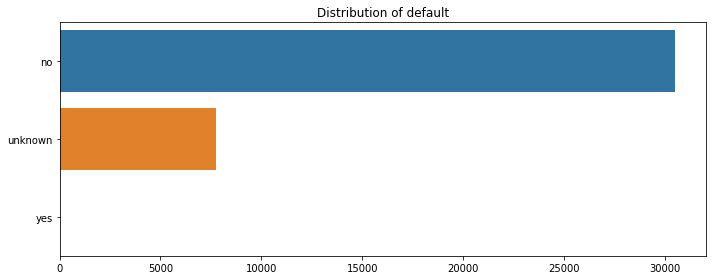

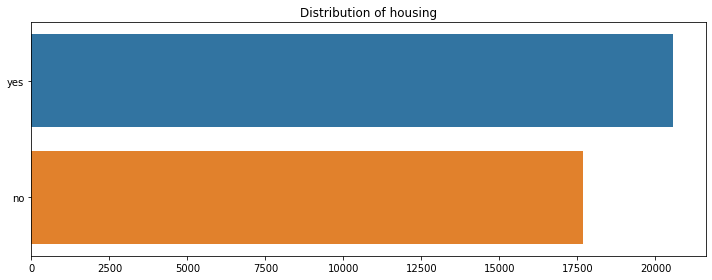

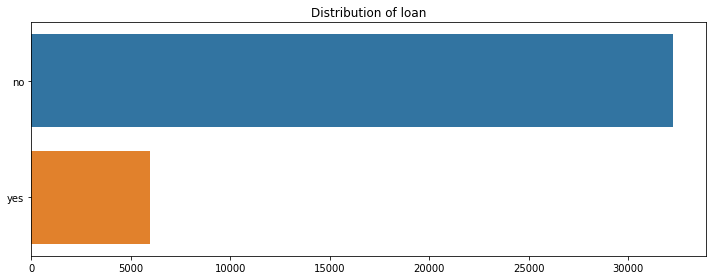

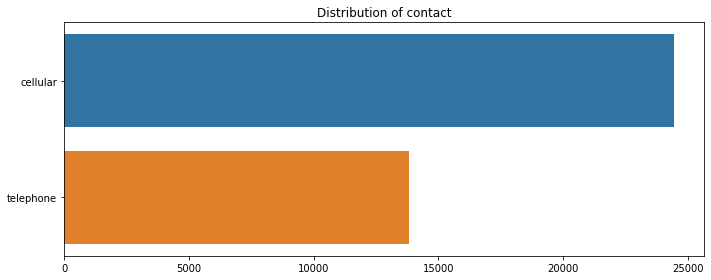

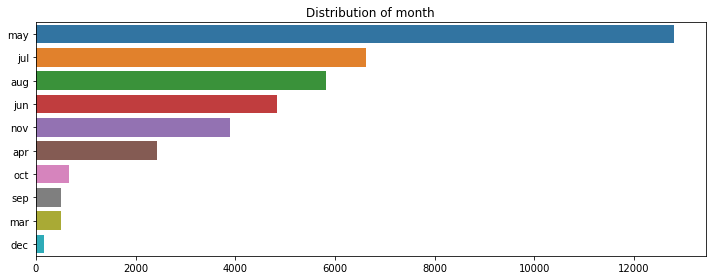

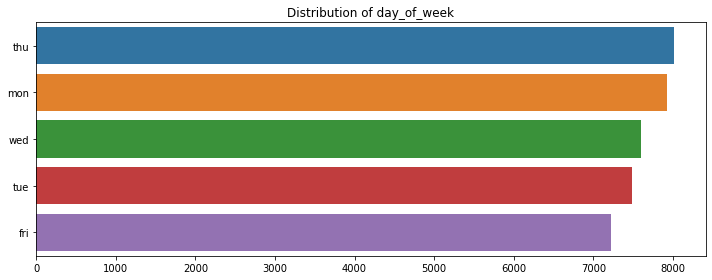

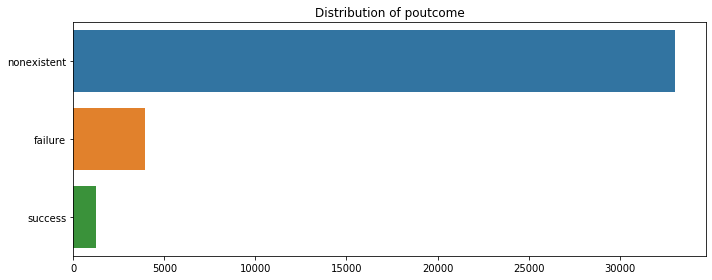

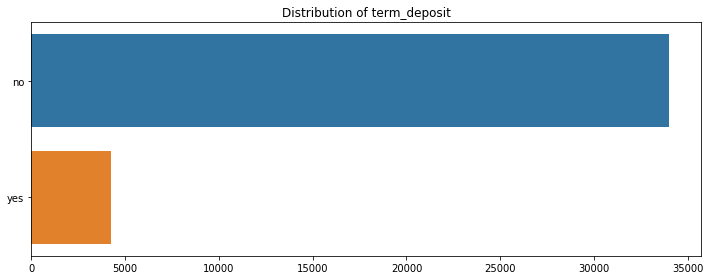

In [126]:
categorcial_variables = ['job', 'marital','education','default','housing','loan','contact','month', 'day_of_week','poutcome','term_deposit']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title("Distribution of " + col)
    plt.tight_layout()

# Data Manipulation

Creating dummy variables for the categorical features

In [127]:
bank_marital = pd.get_dummies(bank['marital'])
bank_new = pd.concat([bank, bank_marital], axis=1)
bank_new

bank_job = pd.get_dummies(bank_new['job'])
bank_new = pd.concat([bank_new, bank_job], axis=1)
bank_new

bank_education = pd.get_dummies(bank_new['education'])
bank_new = pd.concat([bank_new, bank_education], axis=1)
bank_new

bank_contact = pd.get_dummies(bank_new['contact'])
bank_new = pd.concat([bank_new, bank_contact], axis=1)
bank_new

bank_month = pd.get_dummies(bank_new['month'])
bank_new = pd.concat([bank_new, bank_month], axis=1)
bank_new

bank_day_of_week = pd.get_dummies(bank_new['day_of_week'])
bank_new = pd.concat([bank_new, bank_day_of_week], axis=1)
bank_new

bank_poutcome = pd.get_dummies(bank_new['poutcome'])
bank_new = pd.concat([bank_new, bank_poutcome], axis=1)
bank_new



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,oct,sep,fri,mon,thu,tue,wed,failure,nonexistent,success
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38240,73.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
38241,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
38242,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
38243,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0


In [128]:
bank_new.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', ' nr_employed', 'term_deposit',
       'divorced', 'married', 'single', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success'], dtype=object)

Using LabelEncoder to encode values for the features

In [129]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_new['default'] = labelencoder_X.fit_transform(bank_new['default'])
bank_new['housing'] = labelencoder_X.fit_transform(bank_new['housing'])
bank_new['loan'] = labelencoder_X.fit_transform(bank_new['loan'])
bank_new['term_deposit'] = labelencoder_X.fit_transform(bank_new['term_deposit'])

In [130]:
bank_new.housing.unique()

array([0, 1], dtype=int64)

In [131]:
bank_new.default.unique()

array([0, 1, 2], dtype=int64)

In [132]:
bank_new.loan.unique()

array([0, 1], dtype=int64)

In [133]:
bank_new.term_deposit.unique()

array([0, 1], dtype=int64)

In [134]:
bank_new.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', ' nr_employed', 'term_deposit',
       'divorced', 'married', 'single', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success'], dtype=object)

Dropping the initial columns by keeping the dummy features created

In [135]:
bank_new=bank_new.drop(columns=['job', 'marital','education','contact', 'month','day_of_week','poutcome'])

In [136]:
bank_new.shape

(38245, 55)

In [137]:
bank_new.columns.values

array(['age', 'default', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', ' nr_employed', 'term_deposit',
       'divorced', 'married', 'single', 'admin.', 'blue-collar',
       'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success'], dtype=object)

In [138]:
sample = bank_new.sample(3000)

# Splitting the dataset into train and test dataset

In [139]:
X = sample.drop(['term_deposit'], axis=1)
y = sample.term_deposit

# Scaling the data using the MinMaxScaler

We are using Standard Scaler. If we use MinMax Scaler the data would be skewed as most of the values in each column are small. So, we decided to use Standard Scaler.

In [140]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state =0, test_size = 0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## KNN Classification

In [141]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [142]:
X.shape

(3000, 54)

Fitting the KNN Classifier model on the training data set

In [143]:
from sklearn.neighbors import KNeighborsClassifier
train_score = []
test_score = []

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

Finding the best value of the K for an accurate train and test score

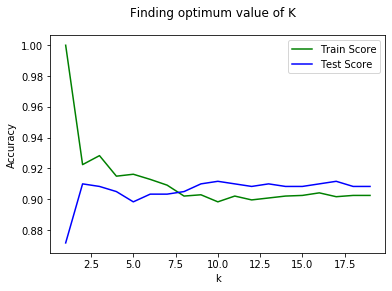

In [144]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.suptitle('Finding optimum value of K')
plt.legend()

Finding the train and test score from the graph we are considering knn = 7

In [145]:
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9092
Test score: 0.9033


Grid search approcah for parameter tuning

In [146]:
from sklearn.neighbors import KNeighborsClassifier
kfold =KFold(n_splits=5, random_state=0)

param_grid={'n_neighbors':range(1,10)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

test=cross_val_score(grid_search, X_test, y_test, cv=kfold).mean()

In [147]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8925
Test 0.9033333333333333
parameters {'n_neighbors': 3}


In [148]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[530  13]
 [ 42  15]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       543
           1       0.54      0.26      0.35        57

    accuracy                           0.91       600
   macro avg       0.73      0.62      0.65       600
weighted avg       0.89      0.91      0.89       600



Calculating the accuracy of the model

In [149]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, grid_search.predict(X_test))
knn_accuracy

0.9083333333333333

Calculating the precision_score of the model

In [150]:
from sklearn.metrics import precision_score
knn_precision = precision_score(y_test,grid_search.predict(X_test))
knn_precision

0.5357142857142857

Calculating the f1_score of the model

In [151]:
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test, grid_search.predict(X_test))
knn_f1

0.35294117647058815

A dataframe to display the model, optimum parameter value. train_score, test_score, accuracy, precision and f1 score

In [152]:
model_results = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score','Accuracy','precision','f1'))

In [153]:
model_results.loc[len(model_results)]=[1,'K-neighbors',grid_search.best_params_,grid_search.best_score_,test, knn_accuracy, knn_precision, knn_f1]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,f1
0,1,K-neighbors,{'n_neighbors': 3},0.8925,0.903333,0.908333,0.535714,0.352941


# Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
kfold =KFold(n_splits=5, random_state=0)

param_grid={'penalty':['l1','l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True)
grid_search.fit(X_train,y_train)

k_test=cross_val_score(grid_search, X_test, y_test, cv=kfold).mean()

c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sweety\appdata\local\programs\pytho

In [155]:
print("Train:",grid_search.best_score_)
print("Test",k_test)
print("parameters",grid_search.best_params_)

Train: 0.8991666666666667
Test 0.9116666666666667
parameters {'C': 0.01, 'penalty': 'l2'}


In [156]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[526  17]
 [ 29  28]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       543
           1       0.62      0.49      0.55        57

    accuracy                           0.92       600
   macro avg       0.78      0.73      0.75       600
weighted avg       0.92      0.92      0.92       600



In [157]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9233333333333333

In [158]:
precision = precision_score(y_test,grid_search.predict(X_test))
precision

0.6222222222222222

In [159]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.5490196078431373

In [160]:
model_results.loc[len(model_results)]=[2,'Logistic Regression',grid_search.best_params_, grid_search.best_score_,test, accuracy, precision, f1]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,f1
0,1,K-neighbors,{'n_neighbors': 3},0.892500,0.903333,0.908333,0.535714,0.352941
1,2,Logistic Regression,"{'C': 0.01, 'penalty': 'l2'}",0.899167,0.903333,0.923333,0.622222,0.549020


# Linear Support Vector Machine

In [161]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 10, 0.1, 1, 100]}
grid_search = GridSearchCV(LinearSVC(),param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sweety\appdata\local\programs\python\python

In [162]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8983333333333333
Test 0.9166340255110308
parameters {'C': 0.01}


In [163]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[530  13]
 [ 31  26]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       543
           1       0.67      0.46      0.54        57

    accuracy                           0.93       600
   macro avg       0.81      0.72      0.75       600
weighted avg       0.92      0.93      0.92       600



In [164]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[530  13]
 [ 31  26]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       543
           1       0.67      0.46      0.54        57

    accuracy                           0.93       600
   macro avg       0.81      0.72      0.75       600
weighted avg       0.92      0.93      0.92       600



In [165]:
precision =precision_score(y_test, grid_search.predict(X_test))
precision

0.6666666666666666

In [166]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.5416666666666666

In [167]:
model_results.loc[len(model_results)]=[3,'Linear SVC',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, f1]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,f1
0,1,K-neighbors,{'n_neighbors': 3},0.892500,0.903333,0.908333,0.535714,0.352941
1,2,Logistic Regression,"{'C': 0.01, 'penalty': 'l2'}",0.899167,0.903333,0.923333,0.622222,0.549020
2,3,Linear SVC,{'C': 0.01},0.898333,0.916634,0.923333,0.666667,0.541667


# Support Vector Machine with RBF Kernel

In [168]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 10, 1],'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [169]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8975
Test 0.9016611107252819
parameters {'C': 10, 'gamma': 0.01}


In [170]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[519  24]
 [ 26  31]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       543
           1       0.56      0.54      0.55        57

    accuracy                           0.92       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.92      0.92      0.92       600



In [171]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9166666666666666

In [172]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5636363636363636

In [173]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.5535714285714286

In [174]:
model_results.loc[len(model_results)]=[4,'SVC-RBF',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, f1]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,f1
0,1,K-neighbors,{'n_neighbors': 3},0.892500,0.903333,0.908333,0.535714,0.352941
1,2,Logistic Regression,"{'C': 0.01, 'penalty': 'l2'}",0.899167,0.903333,0.923333,0.622222,0.549020
2,3,Linear SVC,{'C': 0.01},0.898333,0.916634,0.923333,0.666667,0.541667
3,4,SVC-RBF,"{'C': 10, 'gamma': 0.01}",0.897500,0.901661,0.916667,0.563636,0.553571


# Support Vector Machine with Linear Kernel

In [175]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

In [176]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.8954166666666666
Test 0.913328240387064
parameters {'C': 0.1}


In [177]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[531  12]
 [ 40  17]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       543
           1       0.59      0.30      0.40        57

    accuracy                           0.91       600
   macro avg       0.76      0.64      0.67       600
weighted avg       0.90      0.91      0.90       600



In [178]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9133333333333333

In [179]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5862068965517241

In [180]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.3953488372093023

In [181]:
model_results.loc[len(model_results)]=[5,'SVC-Linear',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, f1]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,f1
0,1,K-neighbors,{'n_neighbors': 3},0.892500,0.903333,0.908333,0.535714,0.352941
1,2,Logistic Regression,"{'C': 0.01, 'penalty': 'l2'}",0.899167,0.903333,0.923333,0.622222,0.549020
2,3,Linear SVC,{'C': 0.01},0.898333,0.916634,0.923333,0.666667,0.541667
3,4,SVC-RBF,"{'C': 10, 'gamma': 0.01}",0.897500,0.901661,0.916667,0.563636,0.553571
4,5,SVC-Linear,{'C': 0.1},0.895417,0.913328,0.913333,0.586207,0.395349


# Support Vector Machine with Poly Kernel

In [182]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=kfold, return_train_score=True);

grid_search.fit(X_train, y_train)

test=cross_val_score(grid_search,X_test, y_test,cv=5).mean();

c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\sweety\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warnin

In [183]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.9004166666666666
Test 0.9033973424080376
parameters {'C': 1}


In [184]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[530  13]
 [ 41  16]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       543
           1       0.55      0.28      0.37        57

    accuracy                           0.91       600
   macro avg       0.74      0.63      0.66       600
weighted avg       0.89      0.91      0.90       600



In [185]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.91

In [186]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5517241379310345

In [187]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.37209302325581395

In [188]:
model_results.loc[len(model_results)]=[6,'SVC-Poly',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, f1]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,f1
0,1,K-neighbors,{'n_neighbors': 3},0.892500,0.903333,0.908333,0.535714,0.352941
1,2,Logistic Regression,"{'C': 0.01, 'penalty': 'l2'}",0.899167,0.903333,0.923333,0.622222,0.549020
2,3,Linear SVC,{'C': 0.01},0.898333,0.916634,0.923333,0.666667,0.541667
3,4,SVC-RBF,"{'C': 10, 'gamma': 0.01}",0.897500,0.901661,0.916667,0.563636,0.553571
4,5,SVC-Linear,{'C': 0.1},0.895417,0.913328,0.913333,0.586207,0.395349
5,6,SVC-Poly,{'C': 1},0.900417,0.903397,0.910000,0.551724,0.372093


# Decision Tree Classifier

In [189]:
from sklearn.tree import DecisionTreeClassifier

param_grid ={'max_depth': [1,2,3,4,5,6,7,8,9,10], }
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, return_train_score = True);

grid_search.fit(X_train, y_train)

test = cross_val_score(grid_search, X_test, y_test, cv = 5).mean();

In [190]:
print("Train:",grid_search.best_score_)
print("Test",test)
print("parameters",grid_search.best_params_)

Train: 0.90375
Test 0.9000222237655393
parameters {'max_depth': 4}


In [191]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, grid_search.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, grid_search.predict(X_test), target_names=["0", "1"]))

Confusion matrix:
[[526  17]
 [ 33  24]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       543
           1       0.59      0.42      0.49        57

    accuracy                           0.92       600
   macro avg       0.76      0.69      0.72       600
weighted avg       0.91      0.92      0.91       600



In [192]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, grid_search.predict(X_test))
accuracy

0.9166666666666666

In [193]:
precision = precision_score(y_test, grid_search.predict(X_test))
precision

0.5853658536585366

In [194]:
f1 = f1_score(y_test, grid_search.predict(X_test))
f1

0.48979591836734687

In [195]:
model_results.loc[len(model_results)]=[7,'Decision tree',grid_search.best_params_,grid_search.best_score_,test, accuracy, precision, f1]
model_results

,S.No,Model_Name,Parameters,Train_Score,Test_Score,Accuracy,precision,f1
0,1,K-neighbors,{'n_neighbors': 3},0.892500,0.903333,0.908333,0.535714,0.352941
1,2,Logistic Regression,"{'C': 0.01, 'penalty': 'l2'}",0.899167,0.903333,0.923333,0.622222,0.549020
2,3,Linear SVC,{'C': 0.01},0.898333,0.916634,0.923333,0.666667,0.541667
3,4,SVC-RBF,"{'C': 10, 'gamma': 0.01}",0.897500,0.901661,0.916667,0.563636,0.553571
4,5,SVC-Linear,{'C': 0.1},0.895417,0.913328,0.913333,0.586207,0.395349
5,6,SVC-Poly,{'C': 1},0.900417,0.903397,0.910000,0.551724,0.372093
6,7,Decision tree,{'max_depth': 4},0.903750,0.900022,0.916667,0.585366,0.489796


# Conclusion

From the above table, based on train, test score, accuracy and precision we concluded that SVC with Kernel Poly is the optimal classification model for our dataset